/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead


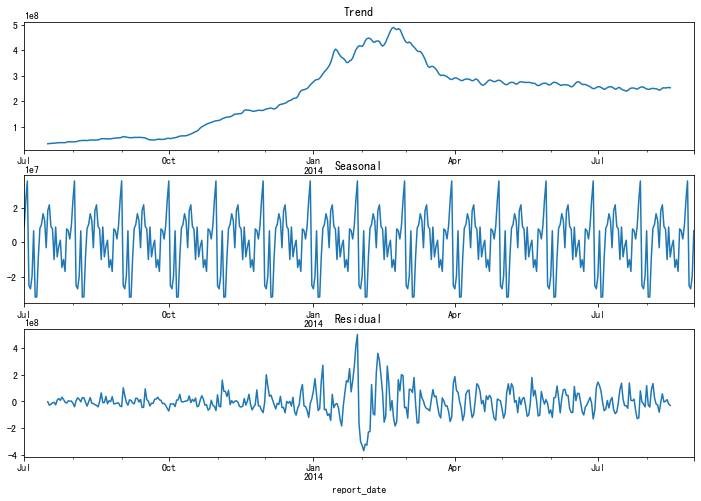

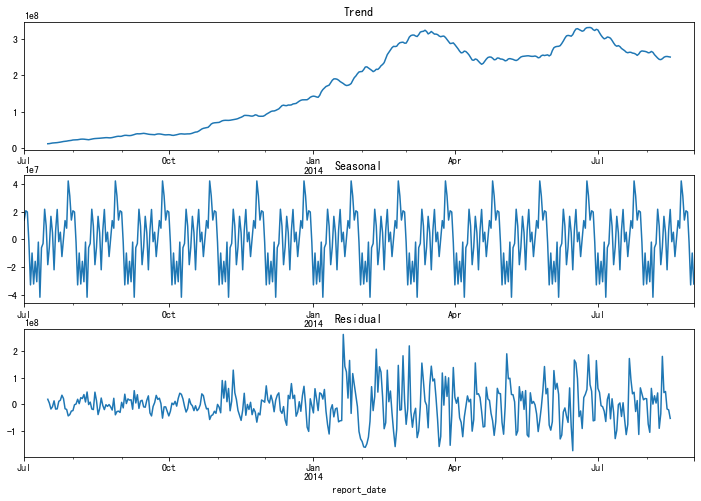

In [1]:
#步骤一 数据加载,数据预处理,数据可视化
#1) 将report_date数据从string格式转换为日期格式
#2) 根据项目需求识别并提取有效字段‘total_purchase_amt’‘total_redeem_amt’，即‘purchase’和‘redeem’
#3) 使用matplotlib工具实现‘purchase’'redeem'的可视化

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
tal_balance = data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
purchase = tal_balance[['total_purchase_amt']]
redeem = tal_balance[['total_redeem_amt']]


def plot_stl(data):
    result = sm.tsa.seasonal_decompose(data,freq=30)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3,title='Residual')
plot_stl(purchase)
plot_stl(redeem)

In [2]:
#步骤二 判断purchase和redeem是否为平稳时序数据，如不平稳将对其施行差分得到平稳时序数据
#1) purchase t值均大于3个置信度的值，无法拒绝原假设，判断得出purchase为不平稳时序数据
#2）对purchase时序数据进行一阶差分后得到平稳时序数据
#3) 同理对redeem时序数据进行平稳性校验，判断为不平稳时序数据，对其进行一阶差分得到平稳时序数据

from statsmodels.tsa.stattools import adfuller

t=adfuller(purchase)
diff11=purchase.diff(1)
t11=adfuller(diff11[1:])
diff12=redeem.diff(1)
t12=adfuller(diff12[1:])
t11,t12

((-7.947102224652343,
  3.198186862488185e-12,
  18,
  407,
  {'1%': -3.4465195891135845,
   '5%': -2.8686676281678634,
   '10%': -2.5705668101226085},
  15918.844657651942),
 (-11.69198690696884,
  1.6443717458497645e-21,
  12,
  413,
  {'1%': -3.4462831955497135,
   '5%': -2.8685636962704395,
   '10%': -2.5705114078759914},
  15779.04993673871))

In [54]:
#步骤三 匹配参数p,q

from itertools import product
from statsmodels.tsa.arima_model import ARIMA

ps = range(0,8)
qs = range(0,8)
parameters = product(ps,qs)
parameters_list = list(parameters)
print(parameters_list)

results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(purchase, order=(param[0], 1, param[1])).fit()
    except ValueError:
        print('参数错误：', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
best_param

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packa

参数错误： (4, 7)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packa

参数错误： (5, 7)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packa

参数错误： (6, 6)
参数错误： (6, 7)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packa

参数错误： (7, 6)
参数错误： (7, 7)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(7, 5)

In [35]:
#步骤四 使用ARIMA模型对历史数据进行拟合并预测
#1) 对purchase和redeem进行预测，同时使用typ=‘levels’进行反差分的到原始预测值

from statsmodels.tsa.arima_model import ARIMA

#import pmdarima as pm
#pm.arima.ndiffs(purchase,test='adf')

purchase_model = ARIMA(purchase, order=(7,1,5)).fit()
purchase_pred = purchase_model.predict('2014-09-01','2014-09-30', typ='levels')
redeem_model = ARIMA(redeem, order=(7,1,5)).fit()
redeem_pred = redeem_model.predict('2014-09-01','2014-09-30', typ='levels')
purchase_pred,redeem_pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packag

(2014-09-01    3.310539e+08
 2014-09-02    3.318762e+08
 2014-09-03    3.338910e+08
 2014-09-04    2.983191e+08
 2014-09-05    2.407509e+08
 2014-09-06    2.266140e+08
 2014-09-07    2.435554e+08
 2014-09-08    2.970865e+08
 2014-09-09    3.321274e+08
 2014-09-10    3.265197e+08
 2014-09-11    2.916841e+08
 2014-09-12    2.392702e+08
 2014-09-13    2.253550e+08
 2014-09-14    2.475289e+08
 2014-09-15    2.950936e+08
 2014-09-16    3.345010e+08
 2014-09-17    3.280818e+08
 2014-09-18    2.927099e+08
 2014-09-19    2.448967e+08
 2014-09-20    2.275711e+08
 2014-09-21    2.530230e+08
 2014-09-22    2.980719e+08
 2014-09-23    3.366748e+08
 2014-09-24    3.321948e+08
 2014-09-25    2.947106e+08
 2014-09-26    2.505384e+08
 2014-09-27    2.318269e+08
 2014-09-28    2.574471e+08
 2014-09-29    3.025702e+08
 2014-09-30    3.387019e+08
 Freq: D, dtype: float64,
 2014-09-01    3.169090e+08
 2014-09-02    3.372455e+08
 2014-09-03    3.632442e+08
 2014-09-04    3.074694e+08
 2014-09-05    2.62805

In [51]:
#步骤五 输出预测结果，并按照项目要求调整数据格式

import pandas as pd

result = pd.DataFrame()
result['report_date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['report_date'].apply(lambda x:str(x).replace('-','')[:8])

0     20140901
1     20140902
2     20140903
3     20140904
4     20140905
5     20140906
6     20140907
7     20140908
8     20140909
9     20140910
10    20140911
11    20140912
12    20140913
13    20140914
14    20140915
15    20140916
16    20140917
17    20140918
18    20140919
19    20140920
20    20140921
21    20140922
22    20140923
23    20140924
24    20140925
25    20140926
26    20140927
27    20140928
28    20140929
29    20140930
Name: report_date, dtype: object

In [52]:
#步骤六 将数据结果生成新的数据表‘tsa_base.csv’，并上传阿里云天池大赛平台
result['report_date'] = result['report_date'].apply(lambda x:str(x).replace('-','')[:8])
result.to_csv('tsa_base.csv', header=None, index=None)